In [106]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV


import warnings
from sklearn.impute import SimpleImputer
from sklearn import svm, linear_model, datasets, mixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, RocCurveDisplay)

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler

In [282]:
df = pd.read_table("healthcare-dataset-stroke-data.csv",sep=",")
dummies = df.join(pd.get_dummies(df[["gender", "ever_married", "work_type", "Residence_type","smoking_status"]]))

In [283]:
X = dummies.loc[:, dummies.columns != "stroke"]
y = dummies["stroke"]

In [273]:
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,1,0,0,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,...,0,0,1,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,1,0,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,0,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,...,0,1,0,0,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,...,0,0,1,0,1,0,0,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,...,0,1,0,0,1,0,0,1,0,0


In [227]:
#zero imputation
dummies["bmi_na"] = dummies["bmi"].isna()
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=None)
dummies.bmi = imp.fit_transform(dummies.bmi.to_numpy().reshape(-1, 1))
dummies

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_na
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,0,0,0,1,0,1,0,0,False
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,...,0,1,0,1,0,0,0,1,0,True
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,0,0,1,0,0,0,1,0,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,1,0,0,0,1,0,0,0,1,False
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,1,0,0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,...,1,0,0,0,1,0,0,1,0,True
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,...,0,1,0,0,1,0,0,1,0,False
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,...,0,1,0,1,0,0,0,1,0,False
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,...,1,0,0,1,0,0,1,0,0,False


In [116]:
#median imputation
imp = SimpleImputer(missing_values=np.nan, strategy='median', fill_value=None)
dummies.bmi = imp.fit_transform(dummies.bmi.to_numpy().reshape(-1, 1))
dummies

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,1,0,0,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,...,0,0,1,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,1,0,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,0,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,...,0,1,0,0,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,...,0,0,1,0,1,0,0,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,...,0,1,0,0,1,0,0,1,0,0


In [204]:
dummies.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'bmi_na'],
      dtype='object')

In [ ]:
keyz = [2,3,4,8,9,14]
gender = [12,13]
married = [15,16]
work = [17,18,19,20,21]
resid = [22,23]
smoke = [24,25,26,27]
for var in [gender, married, work, resid, smoke]:
    keyz.extend(random.sample(var,len(var)-1))

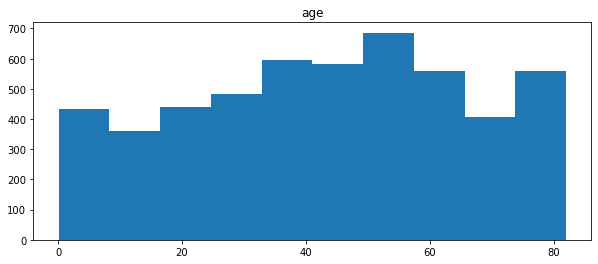

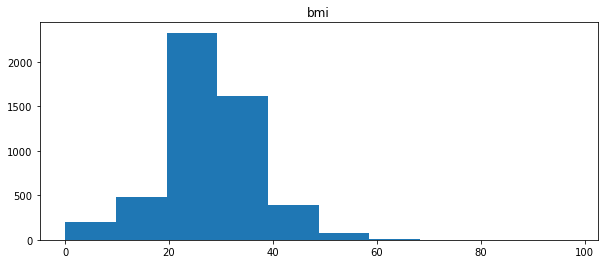

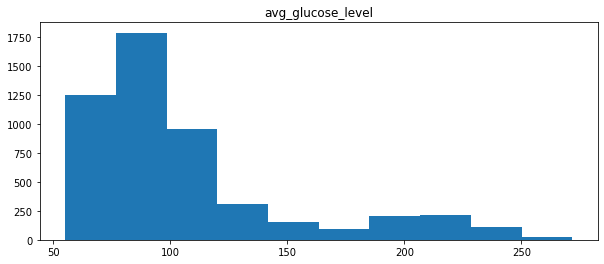

In [231]:
for var in ["age","bmi", "avg_glucose_level"]:
    fig = plt.figure(figsize=(10, 4)) 
    ax = fig.add_subplot()
    ax.hist(dummies[var])
    plt.title(var)
    plt.show()

In [263]:
# split 80% training data, 20% "_tmp" for validation & test
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=.2,
                                                  random_state=0, stratify=y)
# of remaining 20%, split in half to get 10% validation, 10% test
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0, stratify=y_tmp)

In [207]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Other,bmi_na,gender_Male,ever_married_No,work_type_children,work_type_Govt_job,work_type_Self-employed,work_type_Private,Residence_type_Rural,smoking_status_Unknown,smoking_status_never smoked,smoking_status_formerly smoked
943,75.0,0,0,86.40,42.6,0,False,0,0,0,0,0,1,0,0,1,0
821,70.0,1,0,88.66,36.7,0,False,0,0,0,1,0,0,1,0,0,1
4675,8.0,0,0,63.43,21.8,0,False,1,1,1,0,0,0,1,1,0,0
3737,73.0,0,0,98.69,27.6,0,False,0,0,0,0,1,0,1,1,0,0
2067,40.0,0,0,212.97,49.8,0,False,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,10.0,0,0,57.28,15.4,0,False,0,1,1,0,0,0,0,0,1,0
3126,54.0,0,0,114.61,40.1,0,False,1,0,0,0,1,0,0,0,0,1
3896,31.0,0,0,102.39,22.9,0,False,0,1,0,0,0,1,0,0,0,0
1099,34.0,0,0,85.57,26.8,0,False,1,0,0,0,0,1,0,1,0,0


In [157]:
dummies.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [285]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [286]:
clf = svm.SVC(kernel="rbf", C=1, probability=True)
clf.fit(X_train,y_train)

SVC(C=1, probability=True)

In [287]:
clf.score(X_valid, y_valid)

0.9510763209393346

In [288]:
comparison = np.zeros(511)
clf.score(X_valid, comparison)

1.0

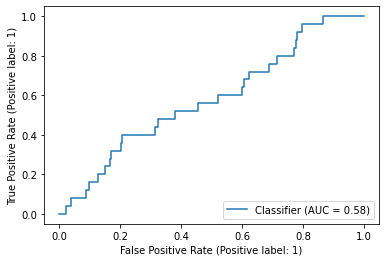

In [252]:
probability_y_is_1 = clf.predict_proba(X_valid)[:, 1]
RocCurveDisplay.from_predictions(y_true=y_valid, y_pred=probability_y_is_1)
plt.show(block=False)

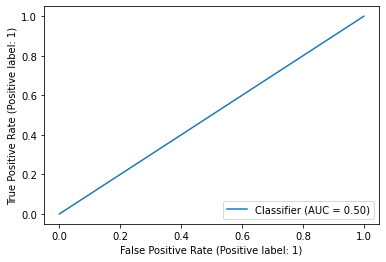

In [253]:
probability_y_is_1 = np.zeros(len(y_valid))
RocCurveDisplay.from_predictions(y_true=y_valid, y_pred=probability_y_is_1)
plt.show(block=False)

In [255]:
y_pred = clf.predict(X_valid)
precision = precision_score(y_true=y_valid, y_pred=y_pred)
recall = recall_score(y_true=y_valid, y_pred=y_pred)
accuracy = accuracy_score(y_true=y_valid, y_pred=y_pred)
probability_y_is_1 = clf.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_true=y_valid, y_score=probability_y_is_1)
print(f'precision={precision:.3}, recall={recall:.3}, accuracy={accuracy:.3}, auc={auc}')

precision=0.0, recall=0.0, accuracy=0.951, auc=0.5808230452674897


In [241]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.5,
                                                    random_state=0, stratify=y_resampled)

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
    max_depth=1, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
probability_y_is_1 = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_true=y_test, y_score=probability_y_is_1)
print(f'precision={precision:.3}, recall={recall:.3}, accuracy={accuracy:.3}, auc={auc:.3}')

precision=0.744, recall=0.862, accuracy=0.783, auc=0.866


In [214]:
#comparison to just guessing 0s
y_pred = np.zeros(len(y_test))
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
probability_y_is_1 = y_pred
auc = roc_auc_score(y_true=y_test, y_score=probability_y_is_1)
print(f'precision={precision:.3}, recall={recall:.3}, accuracy={accuracy:.3}, auc={auc:.3}')

precision=0.0, recall=0.0, accuracy=0.5, auc=0.5


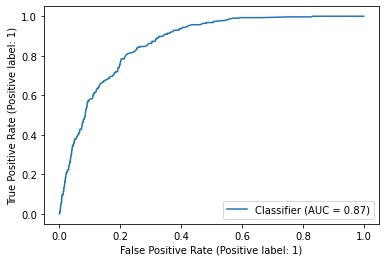

In [215]:
probability_y_is_1 = clf.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=probability_y_is_1)
plt.show(block=False)

In [222]:
dummies.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'bmi_na'],
      dtype='object')

In [306]:
y_zero = np.zeros(len(y_test))
clf = linear_model.Lasso(max_iter=2000)
clf.fit(X_train, y_train)

clf.coef_

array([ 4.24947434e-04,  0.00000000e+00,  0.00000000e+00,  5.99153231e-05,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [ ]:
clf = linear_model.LogisticRegression(max_iter=2000)

In [260]:
X_train.keys()

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Other', 'bmi_na', 'gender_Female', 'ever_married_No',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_Never_worked', 'work_type_children', 'Residence_type_Rural',
       'smoking_status_smokes', 'smoking_status_never smoked',
       'smoking_status_formerly smoked'],
      dtype='object')

In [313]:
def model_eval(clf, imputation="constant", over_sample=False):
    keyz = [2,3,4,8,9,14,24,27,28]
    gender = [12,13]
    married = [15,16]
    work = [17,18,19,20,21]
    resid = [22,23]
        
    dummies["bmi_na"] = dummies["bmi"].isna()
    imp = SimpleImputer(missing_values=np.nan, strategy=imputation, fill_value=None)
    dummies.bmi = imp.fit_transform(dummies.bmi.to_numpy().reshape(-1, 1))
        
    for var in [gender, married, work, resid]:
        keyz.extend(random.sample(var,len(var)-1))   
    X = dummies[dummies.keys()[keyz]]
        
    if over_sample:
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.5,
                                                    random_state=0, stratify=y_resampled)
    else:
        # split 80% training data, 20% "_tmp" for validation & test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                  random_state=0, stratify=y)
        # of remaining 20%, split in half to get 10% validation, 10% test
        #X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
                                                  #random_state=0, stratify=y_tmp)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = precision_score(y_true=y_test, y_pred=y_pred)
    recall = recall_score(y_true=y_test, y_pred=y_pred)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    probability_y_is_1 = clf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_true=y_test, y_score=probability_y_is_1)
    probability_y_is_1 = clf.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_true=y_test, y_pred=probability_y_is_1)
    plt.show(block=False)
    
    zeros = np.zeros(len(y_test))
    zprecision = precision_score(y_true=y_test, y_pred=zeros)
    zrecall = recall_score(y_true=y_test, y_pred=zeros)
    zaccuracy = accuracy_score(y_true=y_test, y_pred=zeros)
    zauc = roc_auc_score(y_true=y_test, y_score=zeros)
    zprobability_y_is_1 = zeros
    RocCurveDisplay.from_predictions(y_true=y_test, y_pred=zeros)
    plt.show(block=False)

    print(f'precision={precision:.3}, recall={recall:.3}, accuracy={accuracy:.3}, auc={auc:.3} vs results from guessing zero: precision={zprecision:.3}, recall={zrecall:.3}, accuracy={zaccuracy:.3}, auc={zauc:.3}')
    

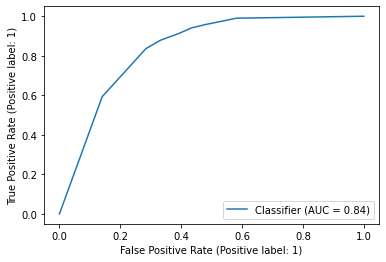

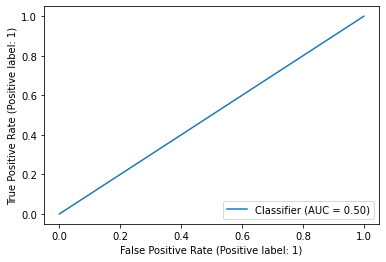

precision=0.746, recall=0.836, accuracy=0.776, auc=0.837 vs results from guessing zero: precision=0.0, recall=0.0, accuracy=0.5, auc=0.5


In [316]:
model_eval(clf=GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,
    max_depth=1, random_state=0), imputation="constant", over_sample=True)

In [305]:
model_eval(clf=linear_model.LogisticRegression(), imputation="constant", over_sample=False)

Model test score: 0.952054794520548 vs comparison score of predicting zero: 0.99706457925636


In [ ]:
y_pred = clf.predict(X_test)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
probability_y_is_1 = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_true=y_test, y_score=probability_y_is_1)
print(f'precision={precision:.3}, recall={recall:.3}, accuracy={accuracy:.3}, auc={auc:.3}')
probability_y_is_1 = clf.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=probability_y_is_1)
plt.show(block=False)

In [ ]:
warnings.filterwarnings(action='ignore')
models = [GradientBoostingClassifier()]

parameters = [{'n_estimators':(25,100,150), 'learning_rate':[0.01, 0.1, 0.25, 0.5, 1], 'max_depth': [1,2,3,5,10]}]

bestparam = None

clf = GridSearchCV(models[i], parameters[i])
#    clf.fit(X_train, y_train)
#    if clf.score(X_valid, y_valid) > bestclf:
#        bestparam = clf.best_params_
#        bestclf = clf.score(X_valid, y_valid)
#        bestidx = i
#print("best index: ", bestidx, "\nbest classifier: ", models[bestidx], "\nbest parameters: ", bestparam, "\nbest validation score: ", round(bestclf,3))